# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 578


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()  # Make sure to import the 'requests' module

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | anadyr
Processing Record 3 of Set 1 | howrah
Processing Record 4 of Set 1 | port moresby
Processing Record 5 of Set 1 | atar
Processing Record 6 of Set 1 | college
Processing Record 7 of Set 1 | vilyuchinsk
Processing Record 8 of Set 1 | parabel'
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | badger
Processing Record 12 of Set 1 | side
Processing Record 13 of Set 1 | san antonio de pale
Processing Record 14 of Set 1 | bethel
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | khodzha-maston
Processing Record 17 of Set 1 | north branch
Processing Record 18 of Set 1 | kuching
Processing Record 19 of Set 1 | papatowai
Processing Record 20 of Set 1 | adamstown
Processing Record 21 of Set 1 | hawaiian paradise park
Processing Record 22 of Set 1 | blackmans bay
Processi

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          553
Lat           553
Lng           553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,5.48,55,96,4.72,GS,1706748696
1,anadyr,64.7500,177.4833,-22.72,77,75,6.00,RU,1706748697
2,howrah,22.5892,88.3103,19.00,88,75,1.54,IN,1706748697
3,port moresby,-9.4431,147.1797,30.68,66,0,5.14,PG,1706748697
4,atar,20.5169,-13.0499,18.87,14,6,4.21,MR,1706748697


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,5.48,55,96,4.72,GS,1706748696
1,anadyr,64.7500,177.4833,-22.72,77,75,6.00,RU,1706748697
2,howrah,22.5892,88.3103,19.00,88,75,1.54,IN,1706748697
3,port moresby,-9.4431,147.1797,30.68,66,0,5.14,PG,1706748697
4,atar,20.5169,-13.0499,18.87,14,6,4.21,MR,1706748697


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

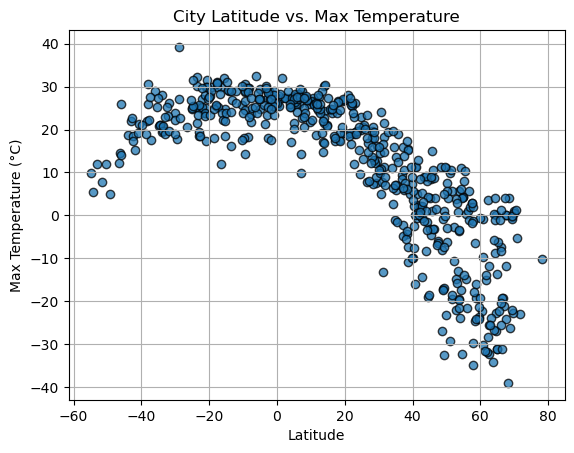

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors='black', alpha=0.75)


# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

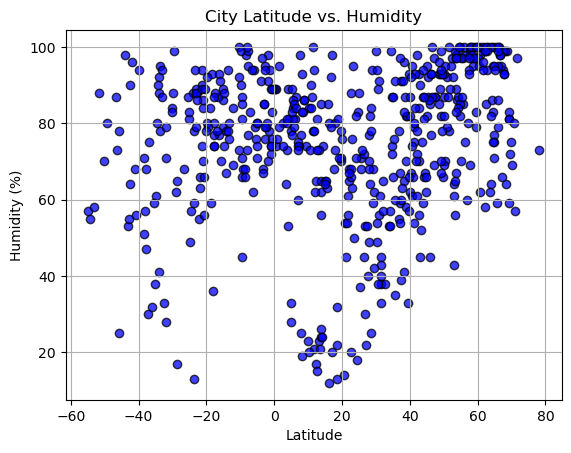

In [13]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors='black', alpha=0.75, color='blue')

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

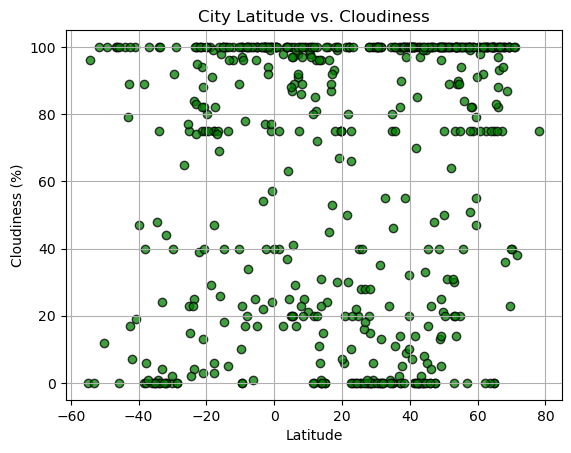

In [14]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors='black', alpha=0.75, color='green')


# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

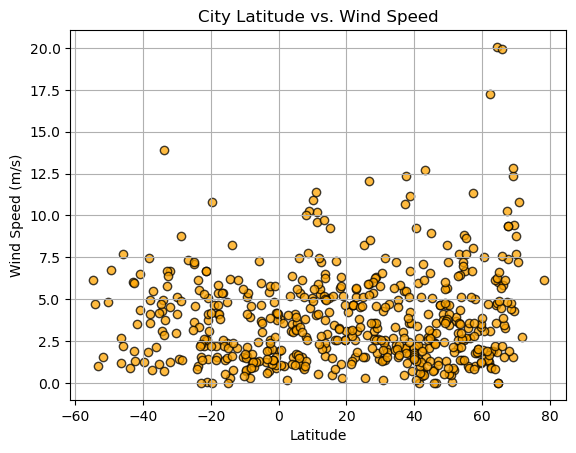

In [15]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors='black', alpha=0.75, color='orange')
# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, x_label, y_label, color, marker):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    
    # Calculate the regression line
    regression_line = slope * x_values + intercept
    
    # Create a scatter plot
    plt.scatter(x_values, y_values, color=color, marker=marker, edgecolors='black', alpha=0.75)
    
    # Plot the regression line
    plt.plot(x_values, regression_line, color='red', label=f"y = {slope:.2f}x + {intercept:.2f}")
    
    # Annotate the linear regression equation on the plot
    equation = f"y = {slope:.2f}x + {intercept:.2f}\nR² = {r_value**2:.2f}"
    plt.annotate(equation, (min(x_values), min(y_values)), fontsize=12, color='red', backgroundcolor='white')

In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,anadyr,64.7500,177.4833,-22.72,77,75,6.00,RU,1706748697
2,howrah,22.5892,88.3103,19.00,88,75,1.54,IN,1706748697
4,atar,20.5169,-13.0499,18.87,14,6,4.21,MR,1706748697
5,college,64.8569,-147.8028,-31.07,71,0,0.00,US,1706748697
6,vilyuchinsk,52.9306,158.4028,-14.85,61,30,2.06,RU,1706748697


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,5.48,55,96,4.72,GS,1706748696
3,port moresby,-9.4431,147.1797,30.68,66,0,5.14,PG,1706748697
8,waitangi,-43.9535,-176.5597,18.79,98,100,0.89,NZ,1706748697
12,san antonio de pale,-1.4014,5.6325,28.05,78,100,4.83,GQ,1706748698
14,port-aux-francais,-49.3500,70.2167,5.10,80,100,6.73,TF,1706748689


###  Temperature vs. Latitude Linear Regression Plot

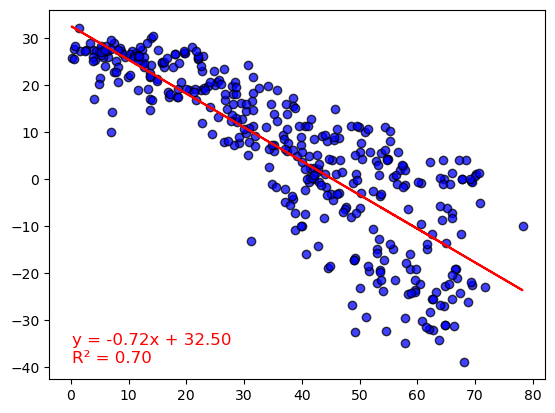

In [19]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],
                       "Northern Hemisphere - City Latitude vs. Max Temperature",
                       "Latitude", "Max Temperature (°C)", 'blue', 'o')

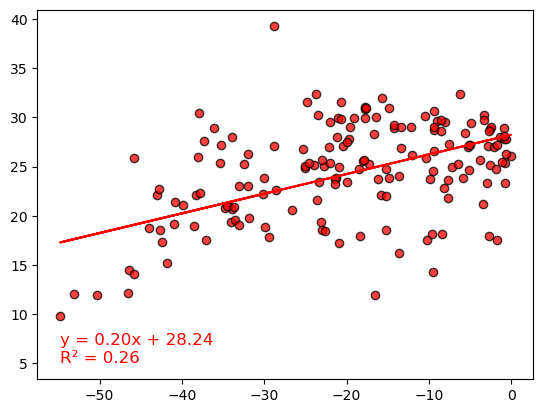

In [20]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"],
                       "Southern Hemisphere - City Latitude vs. Max Temperature",
                       "Latitude", "Max Temperature (°C)", 'red', 'o')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

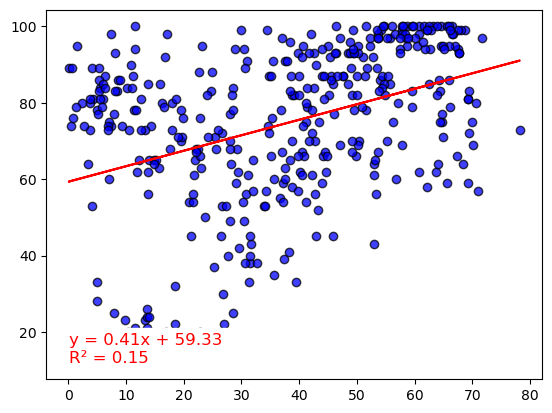

In [21]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"],
                       "Northern Hemisphere - City Latitude vs. Humidity",
                       "Latitude", "Humidity (%)", 'blue', 'o')

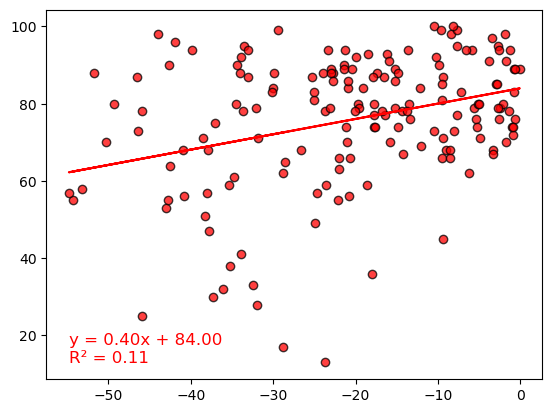

In [22]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"],
                       "Southern Hemisphere - City Latitude vs. Humidity",
                       "Latitude", "Humidity (%)", 'red', 'o')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

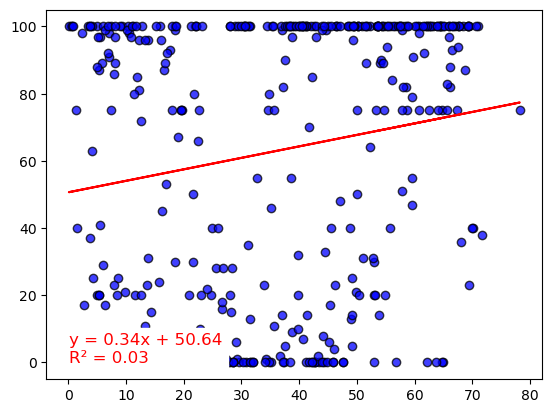

In [23]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"],
                       "Northern Hemisphere - City Latitude vs. Cloudiness",
                       "Latitude", "Cloudiness (%)", 'blue', 'o')

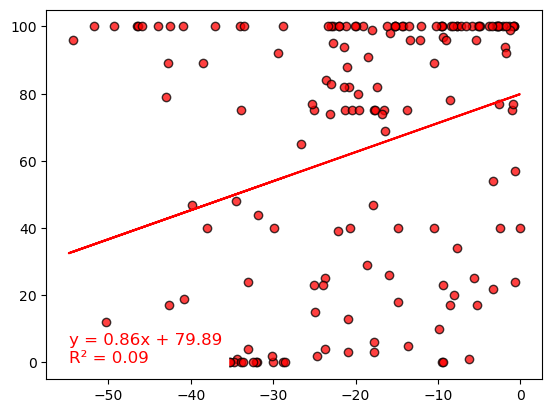

In [24]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"],
                       "Southern Hemisphere - City Latitude vs. Cloudiness",
                       "Latitude", "Cloudiness (%)", 'red', 'o')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

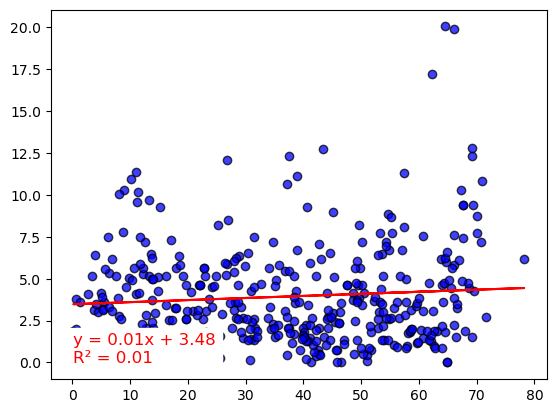

In [25]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"],
                       "Northern Hemisphere - City Latitude vs. Wind Speed",
                       "Latitude", "Wind Speed (m/s)", 'blue', 'o')

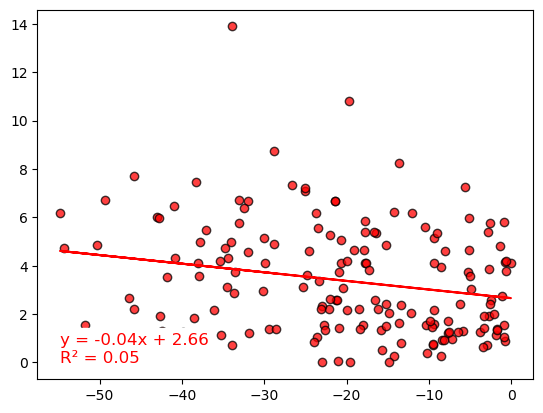

In [26]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"],
                       "Southern Hemisphere - City Latitude vs. Wind Speed",
                       "Latitude", "Wind Speed (m/s)", 'red', 'o')

**Discussion about the linear relationship:** YOUR RESPONSE HERE